Comparing The three countries datasets

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  # for ANOVA

In [2]:
# Load cleaned CSVs
benin = pd.read_csv("E:/Tenx/data/benin_clean.csv")
sierraleone = pd.read_csv("E:/Tenx/data/sierraleone_clean.csv")
togo = pd.read_csv("E:/Tenx/data/togo_clean.csv")

# Add a column to label each dataset
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into a single DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

Metric Comparison (GHI, DNI, DHI)using Boxplot

C:\Users\betsi\AppData\Local\Temp\ipykernel_7236\2515730538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')


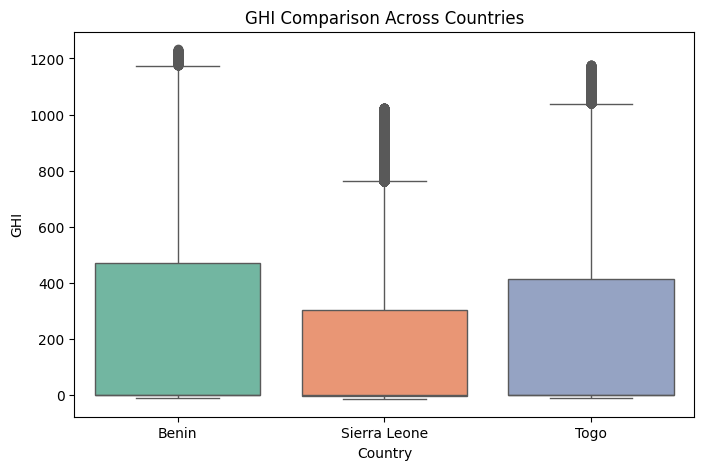

C:\Users\betsi\AppData\Local\Temp\ipykernel_7236\2515730538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')


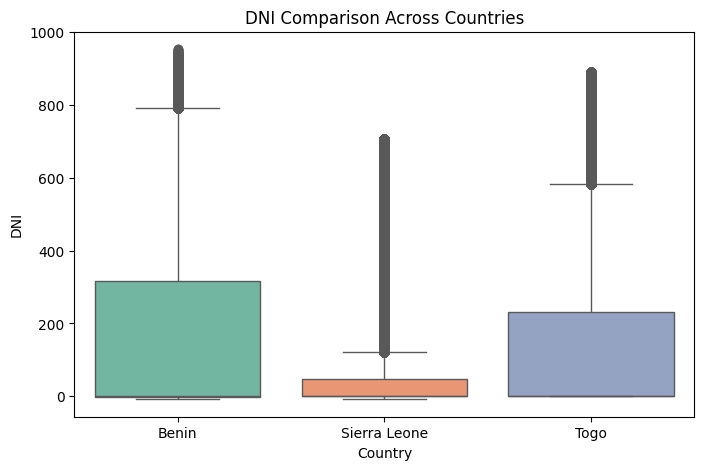

C:\Users\betsi\AppData\Local\Temp\ipykernel_7236\2515730538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')


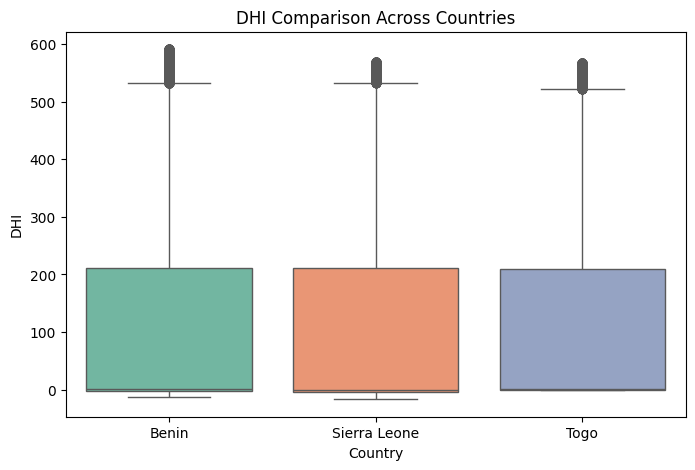

In [3]:
for col in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')
    plt.title(f'{col} Comparison Across Countries')
    plt.show()


Visual Summary (Bar Chart)

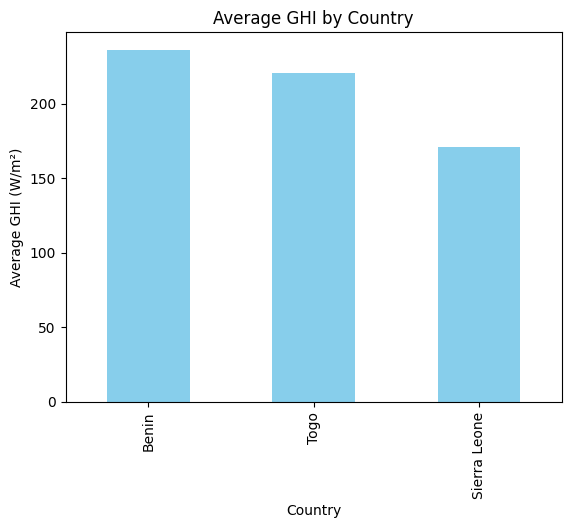

In [4]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='skyblue')
plt.ylabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.show()


## 📈 Statistical Testing and Summary Table

In [7]:
from scipy.stats import f_oneway

# Run one-way ANOVA for GHI across countries
f_stat, p_val = f_oneway(
    df_all[df_all['Country'] == 'Benin']['GHI'],
    df_all[df_all['Country'] == 'Togo']['GHI'],
    df_all[df_all['Country'] == 'Sierra Leone']['GHI']
)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")


ANOVA F-statistic: 6322.04
P-value: 0.0000


In [6]:
# Mean GHI summary table
mean_ghi = df_all.groupby('Country')['GHI'].mean().reset_index()
mean_ghi.columns = ['Country', 'GHI (mean)']
mean_ghi.sort_values(by='GHI (mean)', ascending=False)


,Country,GHI (mean)
0,Benin,236.234508
2,Togo,220.812338
1,Sierra Leone,171.045078
